# Insurance Company  

## About Company  
The Insurance Company operates in West Africa, specifically Nigeria, with a primary focus on auto insurance. The company aims to enhance customer experience by optimizing claims processing and improving service levels.

## Variable Definitions
| Variable                 | Definition                                               |
|--------------------------|----------------------------------------------------------|
|ID                        |	Unique ID for the customer                            |
|Policy Start Date	       | Date policy started                                      |
|Policy End Date           |	Date policy ended                                     |
|Gender                    |	Gender of the customer                                |
|Age                       |	Age of the customer                                   |
|ProductName               |	Name of Insurance policy                              |
|First Transaction Date    |	First date payment was made                           |
|No_Pol	                   | Number of policies the customer has                      |
|Car_Category              |	Type of car                                           |
|Subject_Car_Colour        |	Car colour                                            |
|Subject_Car_Make          |	Car make                                              |
|LGA_Name                  |	City where policy was purchased                       |
|State                     |	State where policy was purchased                      |
|target                    |	Wether the customer claimed within a 3 month period.  |


#### Loading Libraries and Dataset

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier


# Error handling
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset

df = pd.read_csv('insurance_company.csv')

#### DataFrame info

In [3]:
## display a random sample of 10 rows
display(df.sample(10))

# display basic info
display(df.info())

# display summary statistics
display(df.describe(include='all').T)

# checking for the number of NaNs in features
display(df.isna().sum())

# checking the shape of dataset
display(df.shape)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
2141,ID_ROA3OQK,6/14/2007,6/13/2008,Male,39,6/14/2007,5,Saloon,Green,Honda,NaN,NaN,Car Classic,1
8865,ID_S7BNSUC,5/7/2010,5/7/2011,Male,43,5/7/2010,3,Saloon,Blue,Toyota,Makurdi,Benue,Car Classic,0
11588,ID_IDOMKHO,11/19/2010,11/19/2011,Male,48,11/19/2010,2,Truck,Blue,Mack,Ado-Odo/Ota,Ogun,CVTP,0
11202,ID_YG2RR47,10/21/2010,10/21/2011,NaN,120,10/21/2010,2,NaN,White,Toyota,Abuja Municipal,Abuja,CVTP,0
5969,ID_IT9X6R7,7/21/2009,7/21/2010,Male,52,7/21/2009,3,NaN,NaN,NaN,NaN,NaN,Car Classic,0
5697,ID_XYEV5IY,6/12/2009,6/12/2010,Male,51,6/12/2009,2,SUV,Black,Toyota,Obio-Akpor,Rivers,Car Classic,0
3359,ID_ISJM10E,4/27/2008,4/27/2009,Male,41,4/27/2008,4,Saloon,Black,Toyota,Abeokuta,Ogun,Car Classic,0
6256,ID_K40J1QX,9/5/2009,9/5/2010,Unknown,30,9/5/2009,5,NaN,NaN,NaN,Makurdi,Benue,Car Classic,0
3160,ID_Q3E630C,3/22/2008,3/22/2009,Male,40,3/22/2008,5,Saloon,Blue,Toyota,Gwagwalada,Abuja,Car Classic,0
8242,ID_3SIUOWK,3/19/2010,3/19/2011,Female,27,3/19/2010,3,Saloon,Red,Toyota,Enugu-North,Enugu,CarSafe,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12080 non-null  object
 1   Policy Start Date       12080 non-null  object
 2   Policy End Date         12080 non-null  object
 3   Gender                  11659 non-null  object
 4   Age                     12080 non-null  int64 
 5   First Transaction Date  12080 non-null  object
 6   No_Pol                  12080 non-null  int64 
 7   Car_Category            8784 non-null   object
 8   Subject_Car_Colour      9668 non-null   object
 9   Subject_Car_Make        10324 non-null  object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12080 non-null  object
 13  target                  12080 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,12080,7495,ID_MGSDK6X,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Policy Start Date,12080,2227,1/22/2010,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Policy End Date,12080,2227,1/22/2011,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11659,5,Male,7578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,12080.0,NaN,NaN,NaN,38.659023,164.64629,-5939.0,34.0,40.0,48.0,320.0
First Transaction Date,12080,2228,1/22/2010,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_Pol,12080.0,NaN,NaN,NaN,2.565646,1.255172,1.0,2.0,2.0,3.0,5.0
Car_Category,8784,11,Saloon,6389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subject_Car_Colour,9668,36,Black,2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subject_Car_Make,10324,55,Toyota,5801,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     421
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3296
Subject_Car_Colour        2412
Subject_Car_Make          1756
LGA_Name                  6477
State                     6489
ProductName                  0
target                       0
dtype: int64

(12080, 14)

**Observations:**
- Shape of our DataFrame: `14 Columns`, `12080 rows`
- Features does not have a uniform format
- Changing the datatype of `Policy Start Date`, `Policy End Date`, and `First Transaction Date` columns, to datetime.
- Changing the datatype of `target` feature to object datatype.
- Missing values exist in several columns, notably:
  - `Gender`: 421 missing
  - `Car_Category`: 3,296 missing
  - `Subject_Car_Colour`: 2,412 missing
  - `Subject_Car_Make`: 1,756 missing
  - `LGA_Name`: 6,477 missing
  - `State`: 6,489 missing

In [4]:
# convert target column to object data type
df['target'] = df['target'].astype('object')

# convert date features to datetime data type
for column in ['Policy Start Date', 'Policy End Date', 'First Transaction Date']:
    df[column] = pd.to_datetime(df[column])

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      12080 non-null  object        
 1   Policy Start Date       12080 non-null  datetime64[ns]
 2   Policy End Date         12080 non-null  datetime64[ns]
 3   Gender                  11659 non-null  object        
 4   Age                     12080 non-null  int64         
 5   First Transaction Date  12080 non-null  datetime64[ns]
 6   No_Pol                  12080 non-null  int64         
 7   Car_Category            8784 non-null   object        
 8   Subject_Car_Colour      9668 non-null   object        
 9   Subject_Car_Make        10324 non-null  object        
 10  LGA_Name                5603 non-null   object        
 11  State                   5591 non-null   object        
 12  ProductName             12080 non-null  object

None

In [5]:
# Renaming columns to use a uniform format

df = df.rename(columns={'Subject_Car_Make': 'Car_Make', 'Subject_Car_Colour': 'Car_Colour', 'Policy Start Date': 'Policy_Start_Date', 'Policy End Date': 'Policy_End_Date', 'First Transaction Date': 'First_Transaction_Date', 'No_Pol': 'Policy_Count', 'ProductName': 'Product_Name', 'target': 'Target'})

df.sample(2)

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,Policy_Count,Car_Category,Car_Colour,Car_Make,LGA_Name,State,Product_Name,Target
3801,ID_479P88Q,2008-07-24,2009-07-24,Entity,9,2008-07-24,5,SUV,Blue,Toyota,NaN,NaN,Car Classic,1
11827,ID_R6K1L2J,2010-12-09,2011-12-09,Male,35,2010-12-09,2,Saloon,Blue,Honda,NaN,NaN,Car Classic,0


## Exploratory Data Analysis (EDA)

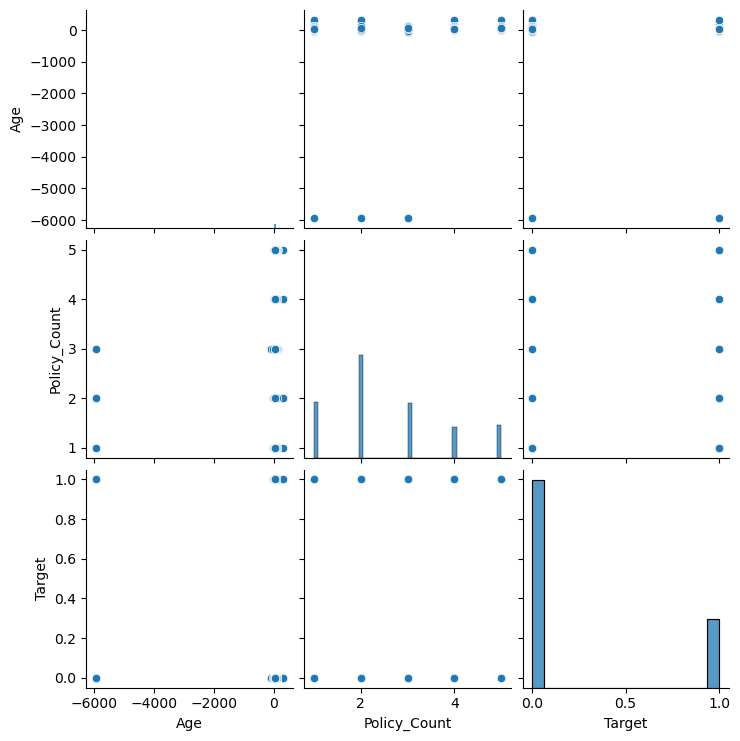

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      12080 non-null  object        
 1   Policy_Start_Date       12080 non-null  datetime64[ns]
 2   Policy_End_Date         12080 non-null  datetime64[ns]
 3   Gender                  11659 non-null  object        
 4   Age                     12080 non-null  int64         
 5   First_Transaction_Date  12080 non-null  datetime64[ns]
 6   Policy_Count            12080 non-null  int64         
 7   Car_Category            8784 non-null   object        
 8   Car_Colour              9668 non-null   object        
 9   Car_Make                10324 non-null  object        
 10  LGA_Name                5603 non-null   object        
 11  State                   5591 non-null   object        
 12  Product_Name            12080 non-null  object

None

In [6]:
# Data Distributions
sns.pairplot(df)

plt.show()

display(df.info())

### Categorical Features Distribution

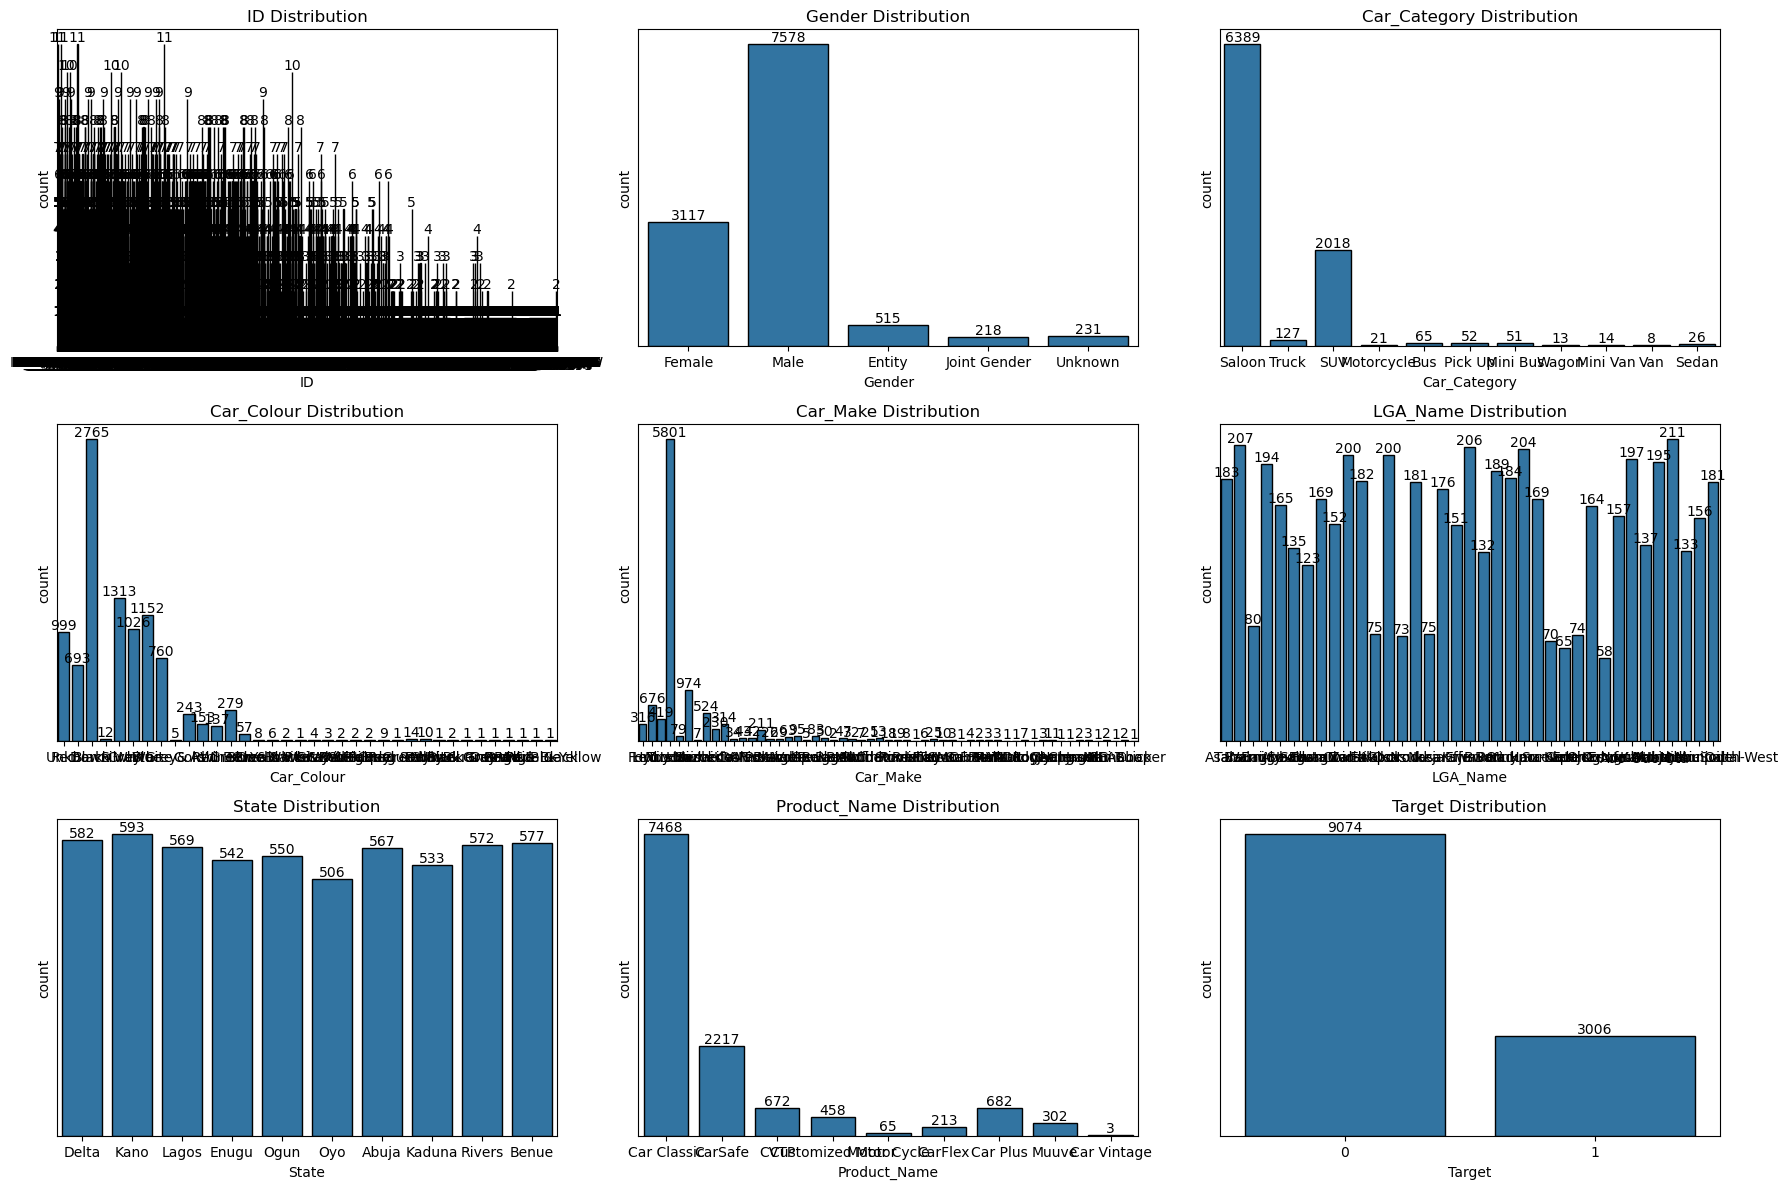

In [7]:
# List of columns to plot
cat_columns = ['ID', 'Gender', 'Car_Category', 'Car_Colour', 'Car_Make', 'LGA_Name', 'State', 'Product_Name', 'Target']

plt.figure(figsize=(18, 12))

# Iterate through the columns and create subplots
for i, column in enumerate(cat_columns, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(x=df[column], data=df, edgecolor='black')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.yticks([])

    # add data labels
    ax.bar_label(ax.containers[0], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

### Numerical Features Distribution

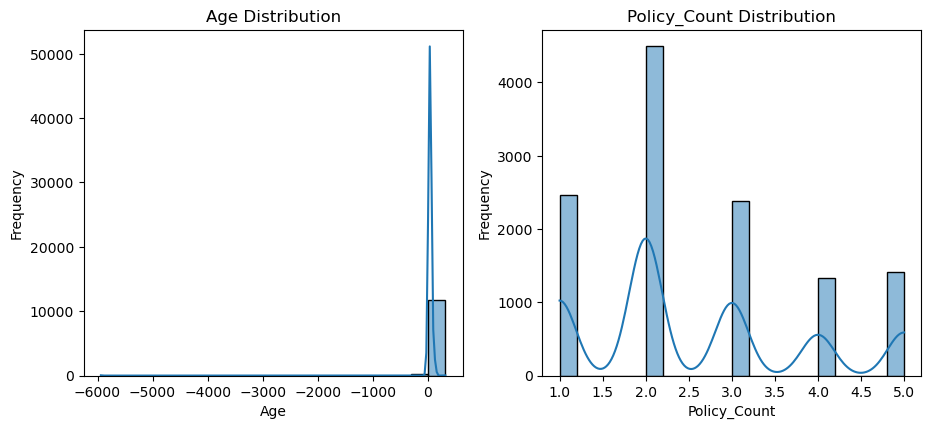

In [8]:
# List of columns to plot
num_columns = ['Age', 'Policy_Count']

# Create the figure
plt.figure(figsize=(14, 8))

# Iterate through the columns and create subplots
for c, column in enumerate(num_columns, 1):
    plt.subplot(2, 3, c)
    sns.histplot(df[column], kde=True, bins = 20)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Visualizing Outliers

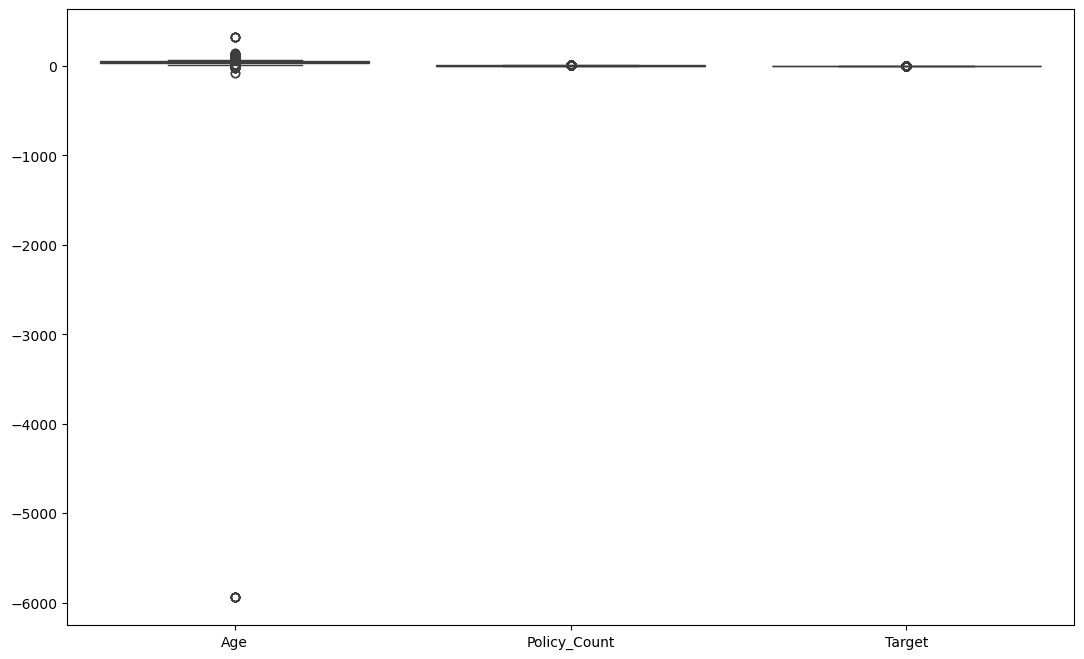

In [9]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=df)
plt.show()

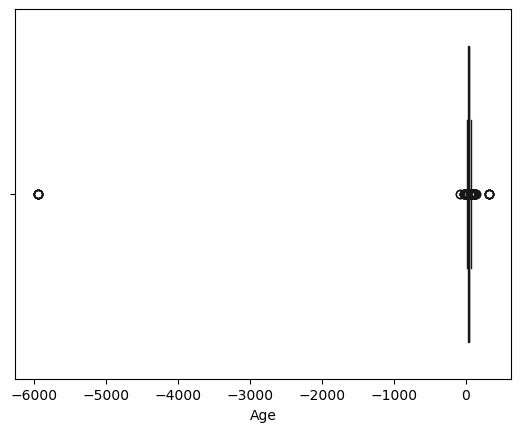

In [10]:
sns.boxplot(x=df['Age'], color='#0F3D15')
plt.show()

shows points lying outside the whiskers, which are considered outliers in the `Age` column.
These outliers indicate that some individuals have ages significantly different from the majority of the dataset, which may require further investigation or treatment depending on the analysis goal.

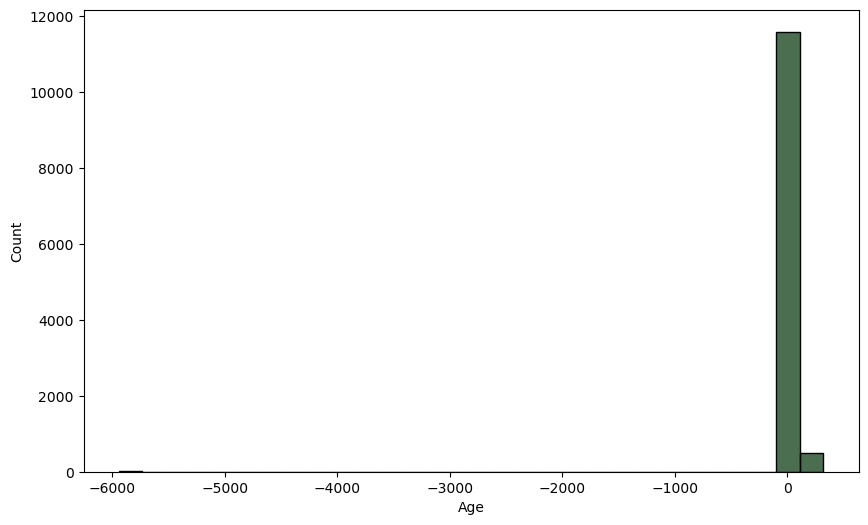

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, color='#0F3D15')
plt.show()

visually confirm whether the outliers seen in the boxplot are rare extreme values or part of the natural distribution.
Peaks will represent the most common age ranges among policy owners.

In [12]:
# change columns with object data types

# extract all categorical columns
categorical_columns =df.select_dtypes(include = 'object').columns.tolist()

# for loop to convert all columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      12080 non-null  category      
 1   Policy_Start_Date       12080 non-null  datetime64[ns]
 2   Policy_End_Date         12080 non-null  datetime64[ns]
 3   Gender                  11659 non-null  category      
 4   Age                     12080 non-null  int64         
 5   First_Transaction_Date  12080 non-null  datetime64[ns]
 6   Policy_Count            12080 non-null  int64         
 7   Car_Category            8784 non-null   category      
 8   Car_Colour              9668 non-null   category      
 9   Car_Make                10324 non-null  category      
 10  LGA_Name                5603 non-null   category      
 11  State                   5591 non-null   category      
 12  Product_Name            12080 non-null  catego

None

### Handling Null Entries and Outliers

In [13]:
# Handling missing values in the Gender, Car_Category, Car_Colour, Car_Make, LGA_Name, and State Columns

columns_to_fill = ['Gender', 'Car_Category', 'Car_Colour', 'Car_Make', 'LGA_Name', 'State']

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mode()[0])

df.isnull().sum()

ID                        0
Policy_Start_Date         0
Policy_End_Date           0
Gender                    0
Age                       0
First_Transaction_Date    0
Policy_Count              0
Car_Category              0
Car_Colour                0
Car_Make                  0
LGA_Name                  0
State                     0
Product_Name              0
Target                    0
dtype: int64

The code handles missing values in selected categorical columns:  
`Gender`, `Car_Category`, `Car_Colour`, `Car_Make`, `LGA_Name`, and `State`.  

`df[column].mode()[0]`: Finds the most frequently occurring value (mode) in each column.  

`fillna()`: Replaces missing values with that mode value.  
> After execution, all missing values in these columns are filled with their most common values, ensuring no nulls remain in those fields.

In [14]:
# Handling outliers in the age column
'''
Male, Female, Joint = Ages >= 18 and <= 75
Entity, Unkown = Ages >= 1 and <= 116
'''

# Define the condition for valid ages
condition = ((df['Gender'].isin(['Male', 'Female', 'Joint Gender']) & df['Age'].between(18, 75, inclusive='both')) | (df['Gender'].isin(['Entity', 'Unknown']) & df['Age'].between(1, 116, inclusive='both')))

# Calculate the total number of entries
total_count = len(df)

# Identify the outliers (rows that *don't* meet the condition)
outliers = ~condition
outlier_count = outliers.sum() # sum of True values gives the count

# Calculate the percentage of outliers
outlier_percentage = (outlier_count / total_count) * 100

print(f"Total entries: {total_count}")
print(f"Outlier entries (ages that don't meet the condition) out of the {total_count}: {outlier_count} ({outlier_percentage:.0f}%)")

Total entries: 12080
Outlier entries (ages that don't meet the condition) out of the 12080: 938 (8%)


***With the percentage of ourliers: 8%, we can choose to replace these with the median age in order to preserve data in terms of row count.***

In [15]:
# Calculate the median of the 'Age' column
median_age = round(df['Age'].median())
print("The median of the age column is:", median_age)

The median of the age column is: 40


The code calculates the median of the `Age` column using `median()`, rounds it to the nearest whole number, and prints the result. The median age of policy owners is 40.

In [16]:
# replacing outliers (entries that do not meet the condition) with the median
'''Replace ages that don't meet the condition with the median age'''

df.loc[~condition, 'Age'] = 40

df.sample(10)

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,Policy_Count,Car_Category,Car_Colour,Car_Make,LGA_Name,State,Product_Name,Target
5304,ID_3AURTYI,2009-04-16,2010-04-16,Female,35,2009-04-16,5,Saloon,Black,Toyota,Kano Municipal,Kano,CarSafe,0
2659,ID_VTK1LK0,2007-12-05,2008-12-04,Male,27,2007-12-05,3,Saloon,Black,Toyota,Epe,Lagos,Car Classic,0
3918,ID_GZSEM4L,2008-08-19,2009-08-19,Male,42,2008-08-19,1,Saloon,Red,Toyota,Kano Municipal,Kano,CarSafe,0
2767,ID_EXWUAB0,2008-01-05,2009-01-04,Male,54,2008-01-05,4,Saloon,Silver,Mercedes,Kano Municipal,Kano,Customized Motor,1
10870,ID_FZDIL3W,2010-09-25,2011-09-25,Male,46,2010-09-25,1,SUV,Black,Honda,Gboko,Benue,Car Classic,0
12052,ID_1R2ROLL,2010-12-23,2011-12-23,Male,37,2010-12-23,1,Saloon,Grey,Toyota,Port Harcourt,Rivers,Car Classic,0
4289,ID_DFNRSW7,2008-10-26,2009-10-26,Female,39,2008-10-26,4,Saloon,Gold,Toyota,Bonny,Rivers,Car Classic,1
5006,ID_URJOHFX,2009-02-27,2010-02-27,Male,40,2009-02-27,4,Saloon,Black,Toyota,Bwari,Abuja,CarSafe,0
9165,ID_HVKRF1X,2010-05-26,2011-05-26,Male,52,2010-05-26,2,Saloon,Black,Volkswagen,Gwagwalada,Abuja,CarSafe,0
8480,ID_GTZC3IN,2010-04-09,2011-04-09,Male,34,2010-04-09,1,Saloon,Black,Yamaha,Port Harcourt,Rivers,Motor Cycle,0


The code replaces all Age values that do not meet the defined condition (outliers) with the median age (40).

`df.loc[~condition, 'Age'] = 40` finds rows where condition is False (outliers) and replaces their Age values with the median.

`df.sample(10)`: Displays the 10 random rows to confirm the changes.

  
*Outlier ages are replaced with 40, ensuring age values are within the expected range.*

In [17]:
df.shape

(12080, 14)

The dataset shape is now `14 columns` and `12,079 rows` with no `missing values`.

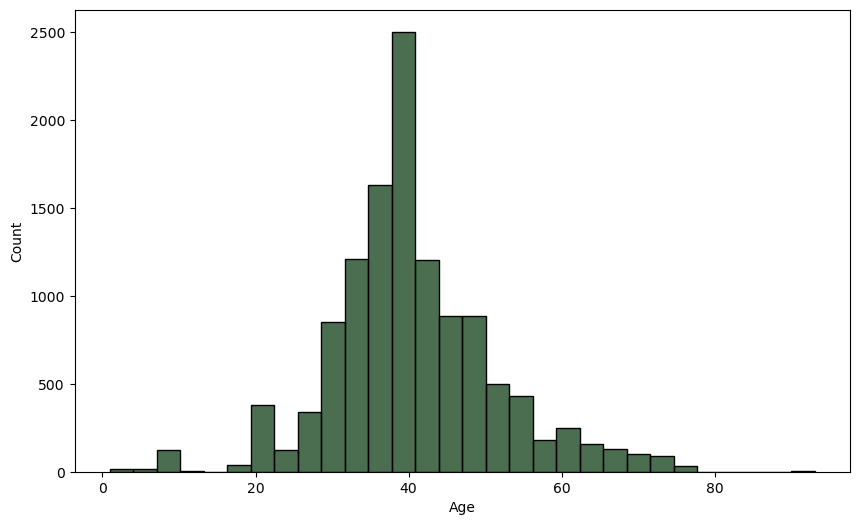

In [18]:
# confirm if outliers have been handled with histplot

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, color='#0F3D15')
plt.show()

Most ages cluster around the central values, with balanced frequencies on both sides, indicating minimal skewness after handling outliers.  
`shows the Age distribution as closely normal or symmetric.`

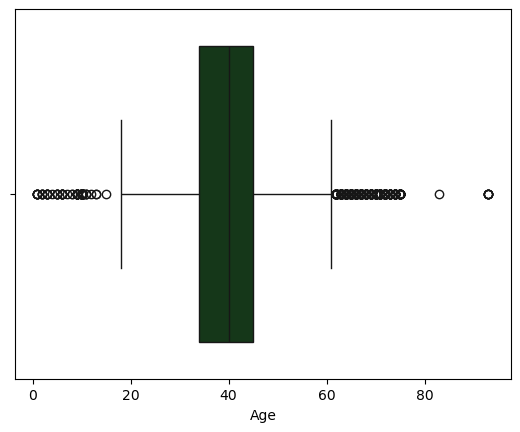

In [19]:
# confirm if outliers have been handled with
sns.boxplot(x=df['Age'], color='#0F3D15')
plt.show()

There are entries after the whiskers which is expected, becauase our age condition for `Entity` and `Unkown`, is age >= 1 and <= 116

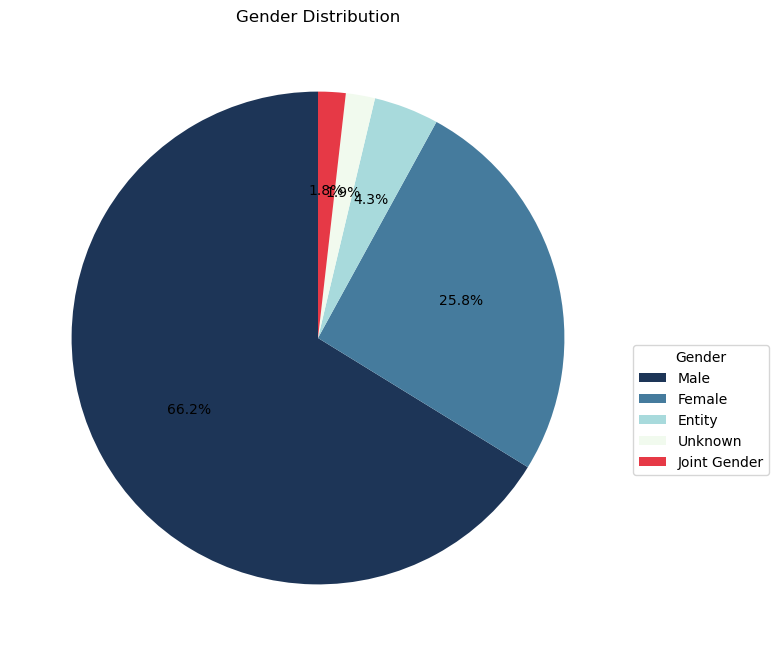

In [20]:
gender_counts = df['Gender'].dropna().value_counts()

custom_colors = ['#1d3557', '#457b9d', '#a8dadc', '#f1faee', '#e63946']

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=None, colors=custom_colors[:len(gender_counts)],autopct='%1.1f%%', startangle=90)

plt.legend(gender_counts.index, title='Gender', loc='best', bbox_to_anchor=(1, 0.5))

plt.title('Gender Distribution')


plt.show()

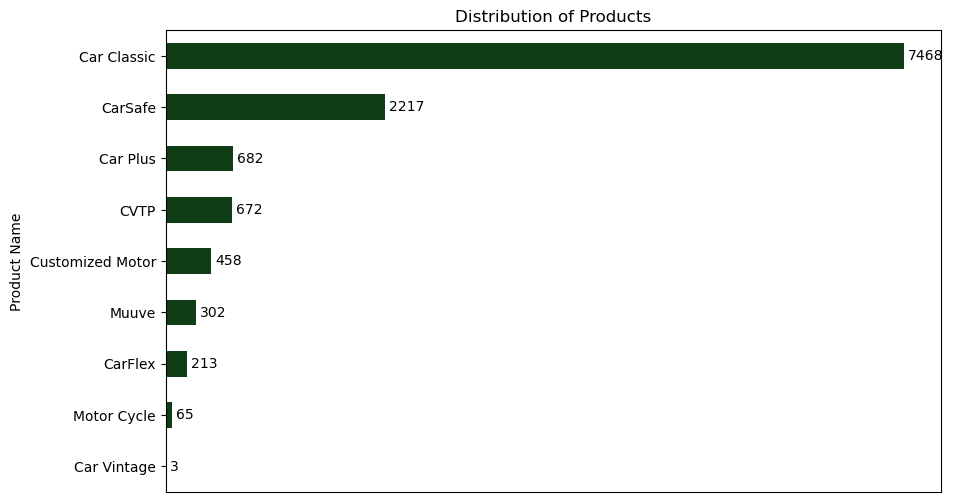

In [21]:
# Product Distribution
product_counts = df['Product_Name'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
bars = product_counts.sort_values().plot(kind='barh', ax=ax, color='#0F3D15')

ax.set_title('Distribution of Products')
ax.set_ylabel('Product Name')
ax.set_xticks([])


for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10)

plt.show()

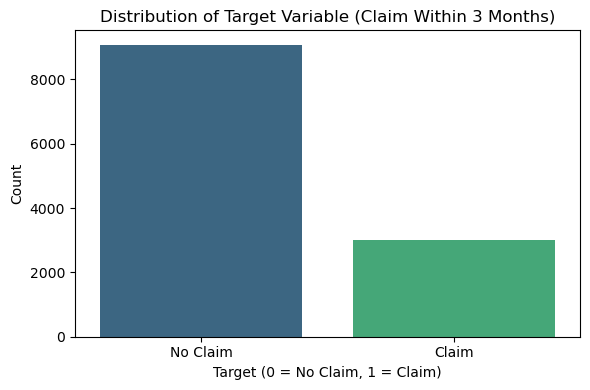

Target Proportions:
Target
0    0.751159
1    0.248841
Name: count, dtype: float64


In [22]:
# Target Variable Distribution
target_counts = df['Target'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title('Distribution of Target Variable (Claim Within 3 Months)')
plt.xlabel('Target (0 = No Claim, 1 = Claim)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Claim', 'Claim'])
plt.tight_layout()
plt.show()

# target proportions
print("Target Proportions:")
print(target_counts / len(df))

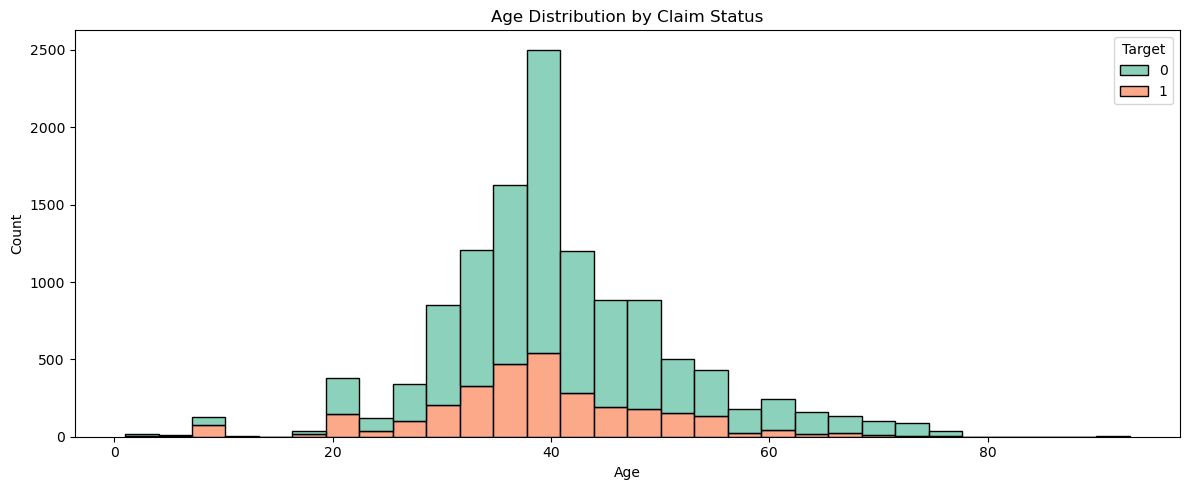

In [23]:
# Age Distribution by Claim Status
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='Age', hue='Target', multiple='stack', bins=30, palette='Set2')
plt.title('Age Distribution by Claim Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

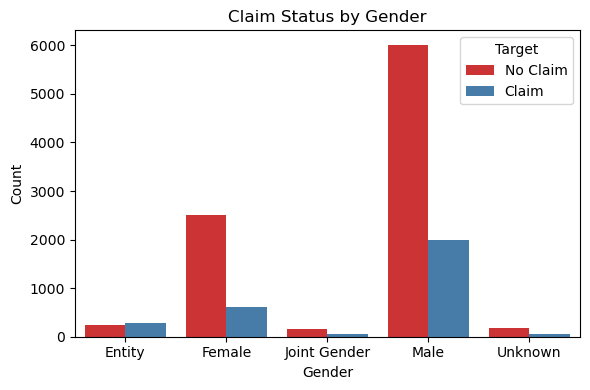

In [24]:
# Gender vs Claim
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Target', palette='Set1')
plt.title('Claim Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Claim', 'Claim'])
plt.tight_layout()
plt.show()

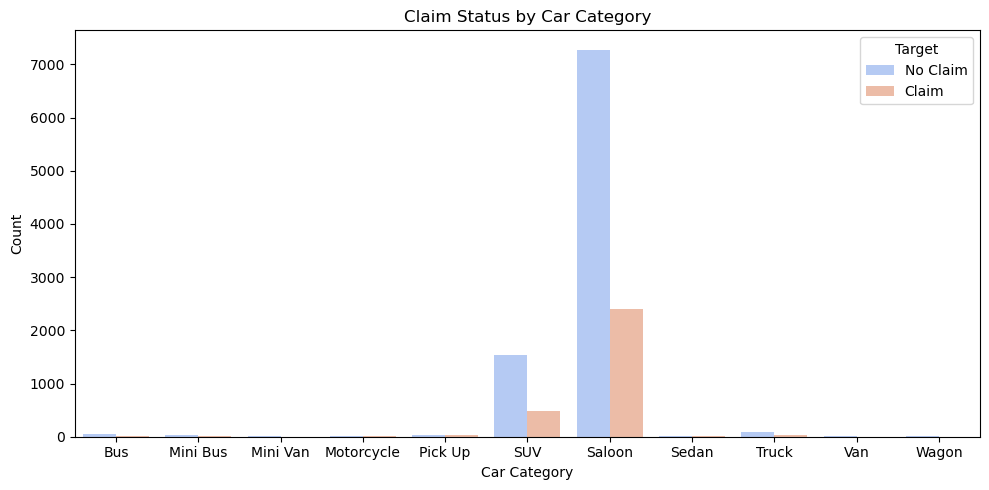

In [25]:
# Car Category vs Claim
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Car_Category', hue='Target', palette='coolwarm')
plt.title('Claim Status by Car Category')
plt.xlabel('Car Category')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Claim', 'Claim'])
plt.tight_layout()
plt.show()

### Handling Duplicates

In [26]:
# check for duplicates
df[df.duplicated()]

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,Policy_Count,Car_Category,Car_Colour,Car_Make,LGA_Name,State,Product_Name,Target


In [27]:
# remove the duplicates
df = df.drop_duplicates()

# check for duplicates again
display(df[df.duplicated()])

# check the new shape
display(df.shape)

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,Policy_Count,Car_Category,Car_Colour,Car_Make,LGA_Name,State,Product_Name,Target


(12080, 14)

The new dataset shape after dropping duplicates is still `14 columns` and `12,080 rows`.

### Saving the Cleaned Dataset for Power BI Dashboard

In [31]:
df.to_csv('cleaned_insurance_company.csv', index=False)

### Feature Engineering

In [28]:
#Dropping 'ID', 'Policy_Start_Date', 'Policy_End_Date','First_Transaction_Date', 'Car_Colour'
'''
As these columns are not necessary for our modeling
'''
df = df.drop(['ID', 'Policy_Start_Date', 'Policy_End_Date', 'First_Transaction_Date', 'Car_Colour'], axis=1)

display(df.head(2))

display(df.info())

,Gender,Age,Policy_Count,Car_Category,Car_Make,LGA_Name,State,Product_Name,Target
0,Female,50,1,Saloon,Ford,Kano Municipal,Kano,Car Classic,1
1,Male,64,4,Saloon,Toyota,Kano Municipal,Kano,CarSafe,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Gender        12080 non-null  category
 1   Age           12080 non-null  int64   
 2   Policy_Count  12080 non-null  int64   
 3   Car_Category  12080 non-null  category
 4   Car_Make      12080 non-null  category
 5   LGA_Name      12080 non-null  category
 6   State         12080 non-null  category
 7   Product_Name  12080 non-null  category
 8   Target        12080 non-null  category
dtypes: category(7), int64(2)
memory usage: 276.7 KB


None

### Model Training and Selecton

We are considering the following models:
- `Random Forest`
- `Decision Tree`
- `Gradient Boosting`
- `XGBoost`

In [33]:
# Defining Features and Target
X = df.drop(['Target'], axis=1)
y = df['Target']

In [34]:
# Separate categorical and numerical columns
categorical_columns = X.select_dtypes(include='category').columns.tolist()
numerical_columns = X.select_dtypes(include=['number']).columns.tolist()

In [35]:
# initialize the encoder
le = LabelEncoder()

#apply the endoder to all the categorical features
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])
df.head()

,Gender,Age,Policy_Count,Car_Category,Car_Make,LGA_Name,State,Product_Name,Target
0,1,0.871777,-1.247407,6,10,21,5,1,1
1,3,2.155583,1.142802,6,49,21,5,5,0
2,3,-1.053932,-1.247407,6,25,21,5,1,0
3,1,-0.962232,-1.247407,6,16,21,5,1,0
4,3,-0.595430,1.142802,6,49,3,2,1,1


In [36]:
#apply standard scaler
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,Gender,Age,Policy_Count,Car_Category,Car_Make,LGA_Name,State,Product_Name,Target
0,-1.330967,0.871777,-1.247407,0.284682,-1.987553,0.15600,0.127123,-0.580380,1
1,0.630492,2.155583,1.142802,0.284682,0.694689,0.15600,0.127123,1.378407,0
2,0.630492,-1.053932,-1.247407,0.284682,-0.955921,0.15600,0.127123,-0.580380,0
3,-1.330967,-0.962232,-1.247407,0.284682,-1.574900,0.15600,0.127123,-0.580380,0
4,0.630492,-0.595430,1.142802,0.284682,0.694689,-2.25622,-1.392817,-0.580380,1


In [37]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

### Random Forest Model Building

In [38]:
# Initialize the model and fit
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

#### Model Evaluation

In [39]:
# Model prediction
rf_model_predictions = rf_model.predict(X_test)

# Model evaluation
print(f"Accuracy of Random Forest Model: {round(accuracy_score(y_test, rf_model_predictions), 3)}")
print(f"Classification Report: \n{classification_report(y_test, rf_model_predictions)}")

Accuracy of Random Forest Model: 0.76
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1815
           1       0.53      0.38      0.44       601

    accuracy                           0.76      2416
   macro avg       0.67      0.63      0.64      2416
weighted avg       0.74      0.76      0.75      2416



In [40]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("SMOTE class distribution:")
print(pd.Series(y_train_smote).value_counts())

# Train Random Forest
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Predict
smote_preds = rf_smote.predict(X_test)

# Evaluate
print("Random Forest with SMOTE")
print("Accuracy:", round(accuracy_score(y_test, smote_preds), 3))
print("Classification Report:\n", classification_report(y_test, smote_preds))

SMOTE class distribution:
Target
0    7259
1    7259
Name: count, dtype: int64
Random Forest with SMOTE
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1815
           1       0.48      0.46      0.47       601

    accuracy                           0.74      2416
   macro avg       0.65      0.65      0.65      2416
weighted avg       0.74      0.74      0.74      2416



In [41]:
# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)

print("SMOTEENN class distribution:")
print(pd.Series(y_train_smoteenn).value_counts())

# Train Random Forest
rf_smoteenn = RandomForestClassifier(random_state=42)
rf_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

# Predict
smoteenn_preds = rf_smoteenn.predict(X_test)

# Evaluate
print("\nRandom Forest with SMOTEENN")
print("Accuracy:", round(accuracy_score(y_test, smoteenn_preds), 3))
print("Classification Report:\n", classification_report(y_test, smoteenn_preds))

SMOTEENN class distribution:
Target
1    3619
0    3607
Name: count, dtype: int64

Random Forest with SMOTEENN
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      1815
           1       0.48      0.62      0.54       601

    accuracy                           0.74      2416
   macro avg       0.67      0.70      0.68      2416
weighted avg       0.77      0.74      0.75      2416



In [42]:
# Initialize the model with balanced class weights
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_balanced.fit(X_train, y_train)

# Make predictions
balanced_preds = rf_balanced.predict(X_test)

# Evaluate the model
print("Random Forest with class_weight='balanced'")
print("Accuracy:", round(accuracy_score(y_test, balanced_preds), 3))
print("Classification Report:\n", classification_report(y_test, balanced_preds))

Random Forest with class_weight='balanced'
Accuracy: 0.744
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1815
           1       0.48      0.42      0.45       601

    accuracy                           0.74      2416
   macro avg       0.65      0.64      0.64      2416
weighted avg       0.73      0.74      0.74      2416



In [43]:
# Compare Random Forest baseline with SMOTE, SMOTEENN, and balanced weights, and choose the best model.

# Collect metrics for Random Forest models
rf_results = {
    'Model': [
        'Random Forest (Baseline)',
        'Random Forest with SMOTE',
        'Random Forest with SMOTEENN',
        'Random Forest with class_weight'
    ],
    'Accuracy': [
        accuracy_score(y_test, rf_model_predictions),
        accuracy_score(y_test, smote_preds),
        accuracy_score(y_test, smoteenn_preds),
        accuracy_score(y_test, balanced_preds)
    ],
    'Precision_0': [
        precision_score(y_test, rf_model_predictions, pos_label=0),
        precision_score(y_test, smote_preds, pos_label=0),
        precision_score(y_test, smoteenn_preds, pos_label=0),
        precision_score(y_test, balanced_preds, pos_label=0)
    ],
    'Recall_0': [
        recall_score(y_test, rf_model_predictions, pos_label=0),
        recall_score(y_test, smote_preds, pos_label=0),
        recall_score(y_test, smoteenn_preds, pos_label=0),
        recall_score(y_test, balanced_preds, pos_label=0)
    ],
    'F1_0': [
        f1_score(y_test, rf_model_predictions, pos_label=0),
        f1_score(y_test, smote_preds, pos_label=0),
        f1_score(y_test, smoteenn_preds, pos_label=0),
        f1_score(y_test, balanced_preds, pos_label=0)
    ],
    'Precision_1': [
        precision_score(y_test, rf_model_predictions, pos_label=1),
        precision_score(y_test, smote_preds, pos_label=1),
        precision_score(y_test, smoteenn_preds, pos_label=1),
        precision_score(y_test, balanced_preds, pos_label=1)
    ],
    'Recall_1': [
        recall_score(y_test, rf_model_predictions, pos_label=1),
        recall_score(y_test, smote_preds, pos_label=1),
        recall_score(y_test, smoteenn_preds, pos_label=1),
        recall_score(y_test, balanced_preds, pos_label=1)
    ],
    'F1_1': [
        f1_score(y_test, rf_model_predictions, pos_label=1),
        f1_score(y_test, smote_preds, pos_label=1),
        f1_score(y_test, smoteenn_preds, pos_label=1),
        f1_score(y_test, balanced_preds, pos_label=1)
    ]
}

# Convert to DataFrame
rf_results_df = pd.DataFrame(rf_results)

# Display results
print("Random Forest Models Comparison")
display(rf_results_df)

# Find the best model based on a chosen metric
best_rf_model = rf_results_df.loc[rf_results_df['F1_1'].idxmax()]

print("\nBest Random Forest Model based on F1-score for Class 1")
display(best_rf_model.to_frame().T)

print(f"\nRecommendation: The best Random Forest model based on F1-score for Class 1 is '{best_rf_model['Model']}' with F1-score of {best_rf_model['F1_1']:.3f}")

Random Forest Models Comparison


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
0,Random Forest (Baseline),0.760348,0.811178,0.887603,0.847672,0.525581,0.376040,0.438409
1,Random Forest with SMOTE,0.740480,0.823882,0.832507,0.828172,0.477663,0.462562,0.469992
2,Random Forest with SMOTEENN,0.739652,0.862027,0.777961,0.817840,0.482005,0.623960,0.543872
3,Random Forest with class_weight,0.744205,0.816499,0.850689,0.833243,0.483810,0.422629,0.451155



Best Random Forest Model based on F1-score for Class 1


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
2,Random Forest with SMOTEENN,0.739652,0.862027,0.777961,0.81784,0.482005,0.62396,0.543872



Recommendation: The best Random Forest model based on F1-score for Class 1 is 'Random Forest with SMOTEENN' with F1-score of 0.544


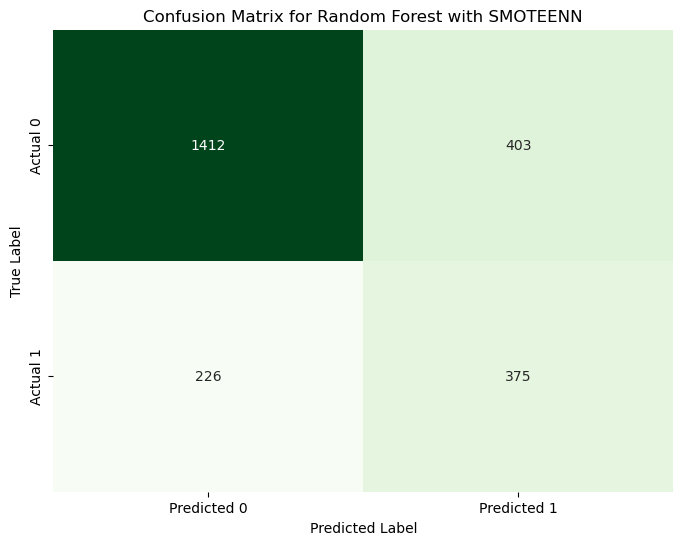

In [44]:
# Confusion Matrix for the best Random Forest model (Random Forest with SMOTEENN)

cm_rf_smoteenn = confusion_matrix(y_test, smoteenn_preds)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_smoteenn, annot=True, fmt='d', cmap='Greens', cbar=False,
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest with SMOTEENN')
plt.show()

### Decision Tree Model Building

In [45]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Model Evaluation

In [46]:
dt_model_predictions = dt_model.predict(X_test)

# accuracy of model
dt_model_accuracy = round(accuracy_score(y_test, dt_model_predictions), 3)
print(f"Accuracy for Decision Tree: {dt_model_accuracy} \n{'-' *60}")

# show the classification report
print('Classification Report: ')
print(classification_report(y_test, dt_model_predictions))

Accuracy for Decision Tree: 0.714 
------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1815
           1       0.42      0.39      0.40       601

    accuracy                           0.71      2416
   macro avg       0.61      0.61      0.61      2416
weighted avg       0.71      0.71      0.71      2416



In [47]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Train Decision Tree
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_smote, y_train_smote)

# Predict & Evaluate
smote_preds = dt_smote.predict(X_test)
print("\nDecision Tree with SMOTE")
print(f"Accuracy: {round(accuracy_score(y_test, smote_preds), 3)}")
print("Classification Report:\n", classification_report(y_test, smote_preds))

Class distribution after SMOTE:
Target
0    7259
1    7259
Name: count, dtype: int64

Decision Tree with SMOTE
Accuracy: 0.707
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1815
           1       0.41      0.43      0.42       601

    accuracy                           0.71      2416
   macro avg       0.61      0.61      0.61      2416
weighted avg       0.71      0.71      0.71      2416



In [48]:
# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)

print("Class distribution after SMOTEENN:")
print(pd.Series(y_train_smoteenn).value_counts())

# Train Decision Tree
dt_smoteenn = DecisionTreeClassifier(random_state=42)
dt_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

# Predict & Evaluate
smoteenn_preds = dt_smoteenn.predict(X_test)
print("\nDecision Tree with SMOTEENN")
print(f"Accuracy: {round(accuracy_score(y_test, smoteenn_preds), 3)}")
print("Classification Report:\n", classification_report(y_test, smoteenn_preds))

Class distribution after SMOTEENN:
Target
1    3619
0    3607
Name: count, dtype: int64

Decision Tree with SMOTEENN
Accuracy: 0.721
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      1815
           1       0.45      0.60      0.52       601

    accuracy                           0.72      2416
   macro avg       0.65      0.68      0.66      2416
weighted avg       0.75      0.72      0.73      2416



In [49]:
# Train Decision Tree with balanced weights
dt_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_balanced.fit(X_train, y_train)

# Predict & Evaluate
balanced_preds = dt_balanced.predict(X_test)
print("\nDecision Tree with class_weight='balanced'")
print(f"Accuracy: {round(accuracy_score(y_test, balanced_preds), 3)}")
print("Classification Report:\n", classification_report(y_test, balanced_preds))


Decision Tree with class_weight='balanced'
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1815
           1       0.40      0.51      0.45       601

    accuracy                           0.69      2416
   macro avg       0.61      0.63      0.62      2416
weighted avg       0.72      0.69      0.70      2416



In [50]:
# Collect metrics for all Decision Tree models
dt_results = {
    'Model': [
        'Decision Tree (Baseline)',
        'Decision Tree with SMOTE',
        'Decision Tree with SMOTEENN',
        'Decision Tree with class_weight'
    ],
    'Accuracy': [
        accuracy_score(y_test, dt_model_predictions),
        accuracy_score(y_test, smote_preds),
        accuracy_score(y_test, smoteenn_preds),
        accuracy_score(y_test, balanced_preds)
    ],
    'Precision_0': [
        precision_score(y_test, dt_model_predictions, pos_label=0),
        precision_score(y_test, smote_preds, pos_label=0),
        precision_score(y_test, smoteenn_preds, pos_label=0),
        precision_score(y_test, balanced_preds, pos_label=0)
    ],
    'Recall_0': [
        recall_score(y_test, dt_model_predictions, pos_label=0),
        recall_score(y_test, smote_preds, pos_label=0),
        recall_score(y_test, smoteenn_preds, pos_label=0),
        recall_score(y_test, balanced_preds, pos_label=0)
    ],
    'F1_0': [
        f1_score(y_test, dt_model_predictions, pos_label=0),
        f1_score(y_test, smote_preds, pos_label=0),
        f1_score(y_test, smoteenn_preds, pos_label=0),
        f1_score(y_test, balanced_preds, pos_label=0)
    ],
    'Precision_1': [
        precision_score(y_test, dt_model_predictions, pos_label=1),
        precision_score(y_test, smote_preds, pos_label=1),
        precision_score(y_test, smoteenn_preds, pos_label=1),
        precision_score(y_test, balanced_preds, pos_label=1)
    ],
    'Recall_1': [
        recall_score(y_test, dt_model_predictions, pos_label=1),
        recall_score(y_test, smote_preds, pos_label=1),
        recall_score(y_test, smoteenn_preds, pos_label=1),
        recall_score(y_test, balanced_preds, pos_label=1)
    ],
    'F1_1': [
        f1_score(y_test, dt_model_predictions, pos_label=1),
        f1_score(y_test, smote_preds, pos_label=1),
        f1_score(y_test, smoteenn_preds, pos_label=1),
        f1_score(y_test, balanced_preds, pos_label=1)
    ]
}

# Convert to DataFrame
dt_results_df = pd.DataFrame(dt_results)

# Display results
print("Decision Tree Models Comparison")
display(dt_results_df)

# Find the best model based on a chosen metric
best_dt_model = dt_results_df.loc[dt_results_df['F1_1'].idxmax()]

print("\nBest Decision Tree Model based on F1-score for Class 1")
display(best_dt_model.to_frame().T)

print(f"\nRecommendation: The best Decision Tree model based on F1-score for Class 1 is '{best_dt_model['Model']}' with F1-score of {best_dt_model['F1_1']:.3f}")

Decision Tree Models Comparison


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
0,Decision Tree (Baseline),0.714404,0.802582,0.822039,0.812194,0.420108,0.389351,0.404145
1,Decision Tree with SMOTE,0.707368,0.808120,0.800551,0.804318,0.414239,0.425957,0.420016
2,Decision Tree with SMOTEENN,0.721440,0.851169,0.762534,0.804417,0.454430,0.597338,0.516175
3,Decision Tree with class_weight,0.689983,0.821084,0.750964,0.784460,0.402116,0.505824,0.448047



Best Decision Tree Model based on F1-score for Class 1


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
2,Decision Tree with SMOTEENN,0.72144,0.851169,0.762534,0.804417,0.45443,0.597338,0.516175



Recommendation: The best Decision Tree model based on F1-score for Class 1 is 'Decision Tree with SMOTEENN' with F1-score of 0.516


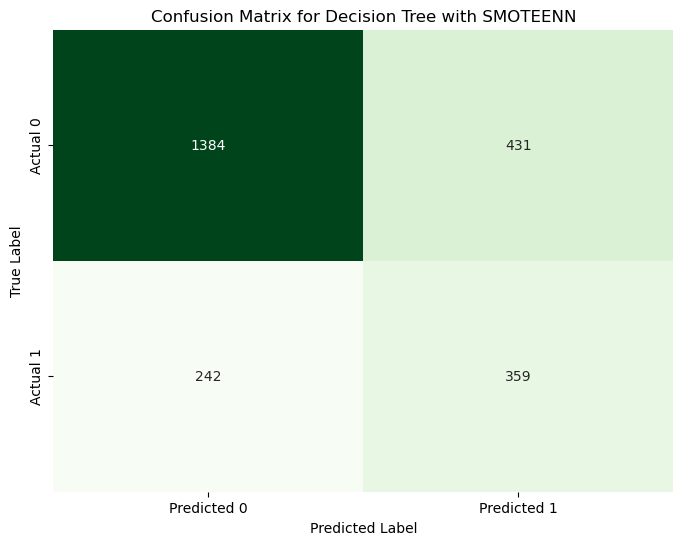

In [51]:
# Confusion Matrix for the best Decision Tree model (Decision Tree with SMOTEENN)

cm_dt_smoteenn = confusion_matrix(y_test, smoteenn_preds)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_smoteenn, annot=True, fmt='d', cmap='Greens', cbar=False,
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree with SMOTEENN')
plt.show()

### Gradient Boosting Model Building

In [52]:
# Gradient Model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

#### Model Evaluation

In [53]:
gb_model_predictions = gb_model.predict(X_test)

# accuracy of model
gb_model_accuracy = round(accuracy_score(y_test, gb_model_predictions), 3)
print(f"Accuracy for Gradient Boosting: {gb_model_accuracy} \n{'-' *60}")

# show the classification report
print('Classification Report: ')
print(classification_report(y_test, gb_model_predictions))

Accuracy for Gradient Boosting: 0.786 
------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1815
           1       0.63      0.33      0.43       601

    accuracy                           0.79      2416
   macro avg       0.72      0.63      0.65      2416
weighted avg       0.76      0.79      0.76      2416



In [54]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Train Gradient Boosting
gb_smote = GradientBoostingClassifier(random_state=42)
gb_smote.fit(X_train_smote, y_train_smote)

# Predict & Evaluate
smote_preds = gb_smote.predict(X_test)
print("\nGradient Boosting with SMOTE")
print(f"Accuracy: {round(accuracy_score(y_test, smote_preds), 3)}")
print("Classification Report:\n", classification_report(y_test, smote_preds))

Class distribution after SMOTE:
Target
0    7259
1    7259
Name: count, dtype: int64

Gradient Boosting with SMOTE
Accuracy: 0.761
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1815
           1       0.52      0.59      0.55       601

    accuracy                           0.76      2416
   macro avg       0.69      0.70      0.69      2416
weighted avg       0.77      0.76      0.77      2416



In [55]:
# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)

print("Class distribution after SMOTEENN:")
print(pd.Series(y_train_smoteenn).value_counts())

# Train Gradient Boosting
gb_smoteenn = GradientBoostingClassifier(random_state=42)
gb_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

# Predict & Evaluate
smoteenn_preds = gb_smoteenn.predict(X_test)
print("\nGradient Boosting with SMOTEENN")
print(f"Accuracy: {round(accuracy_score(y_test, smoteenn_preds), 3)}")
print("Classification Report:\n", classification_report(y_test, smoteenn_preds))

Class distribution after SMOTEENN:
Target
1    3619
0    3607
Name: count, dtype: int64

Gradient Boosting with SMOTEENN
Accuracy: 0.761
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1815
           1       0.52      0.62      0.56       601

    accuracy                           0.76      2416
   macro avg       0.69      0.71      0.70      2416
weighted avg       0.78      0.76      0.77      2416



In [56]:
# Train Gradient Boosting with balanced weights

gb_balanced = GradientBoostingClassifier(random_state=42)

# Calculate sample weights based on class distribution
class_weights = len(y_train) / (2 * np.bincount(y_train))
sample_weights = y_train.map(lambda x: class_weights[x])

# Fit the model with sample weights
gb_balanced.fit(X_train, y_train, sample_weight=sample_weights)

# Predict & Evaluate
balanced_preds = gb_balanced.predict(X_test)
print("\nGradient Boosting with sample_weight")
print(f"Accuracy: {round(accuracy_score(y_test, balanced_preds), 3)}")
print("Classification Report:\n", classification_report(y_test, balanced_preds))


Gradient Boosting with sample_weight
Accuracy: 0.746
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      1815
           1       0.49      0.65      0.56       601

    accuracy                           0.75      2416
   macro avg       0.68      0.71      0.69      2416
weighted avg       0.78      0.75      0.76      2416



In [57]:
# Compare gradient boosting baseline with SMOTE, SMOTEENN, and balanced weights, and choose the best model.

# Collect metrics for all Gradient Boosting models
gb_results = {
    'Model': [
        'Gradient Boosting (Baseline)',
        'Gradient Boosting with SMOTE',
        'Gradient Boosting with SMOTEENN',
        'Gradient Boosting with sample_weight'
    ],
    'Accuracy': [
        accuracy_score(y_test, gb_model_predictions),
        accuracy_score(y_test, smote_preds),
        accuracy_score(y_test, smoteenn_preds),
        accuracy_score(y_test, balanced_preds)
    ],
    
    'Precision_0': [
        precision_score(y_test, gb_model_predictions, pos_label=0),
        precision_score(y_test, smote_preds, pos_label=0),
        precision_score(y_test, smoteenn_preds, pos_label=0),
        precision_score(y_test, balanced_preds, pos_label=0)
    ],
    'Recall_0': [
        recall_score(y_test, gb_model_predictions, pos_label=0),
        recall_score(y_test, smote_preds, pos_label=0),
        recall_score(y_test, smoteenn_preds, pos_label=0),
        recall_score(y_test, balanced_preds, pos_label=0)
    ],
    'F1_0': [
        f1_score(y_test, gb_model_predictions, pos_label=0),
        f1_score(y_test, smote_preds, pos_label=0),
        f1_score(y_test, smoteenn_preds, pos_label=0),
        f1_score(y_test, balanced_preds, pos_label=0)
    ],
    'Precision_1': [
        precision_score(y_test, gb_model_predictions, pos_label=1),
        precision_score(y_test, smote_preds, pos_label=1),
        precision_score(y_test, smoteenn_preds, pos_label=1),
        precision_score(y_test, balanced_preds, pos_label=1)
    ],
    'Recall_1': [
        recall_score(y_test, gb_model_predictions, pos_label=1),
        recall_score(y_test, smote_preds, pos_label=1),
        recall_score(y_test, smoteenn_preds, pos_label=1),
        recall_score(y_test, balanced_preds, pos_label=1)
    ],
    'F1_1': [
        f1_score(y_test, gb_model_predictions, pos_label=1),
        f1_score(y_test, smote_preds, pos_label=1),
        f1_score(y_test, smoteenn_preds, pos_label=1),
        f1_score(y_test, balanced_preds, pos_label=1)
    ]
}

# Convert to DataFrame
gb_results_df = pd.DataFrame(gb_results)

# Display results
print("Gradient Boosting Model Comparison")
display(gb_results_df)

# Find the best model based on a chosen metric
best_gb_model = gb_results_df.loc[gb_results_df['F1_1'].idxmax()]

print("\nBest Gradient Boosting Model based on F1-score for Class 1")
display(best_gb_model.to_frame().T)

print(f"\nRecommendation: The best Gradient Boosting model based on F1-score for Class 1 is '{best_gb_model['Model']}' with F1-score of {best_gb_model['F1_1']:.3f}")

Gradient Boosting Model Comparison


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
0,Gradient Boosting (Baseline),0.785596,0.808663,0.936088,0.867722,0.631746,0.331115,0.434498
1,Gradient Boosting with SMOTE,0.760762,0.856896,0.818182,0.837091,0.516837,0.587354,0.549844
2,Gradient Boosting with SMOTEENN,0.761175,0.865839,0.807163,0.835472,0.516575,0.622296,0.564528
3,Gradient Boosting with sample_weight,0.745861,0.870908,0.776860,0.821200,0.491844,0.652246,0.560801



Best Gradient Boosting Model based on F1-score for Class 1


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
2,Gradient Boosting with SMOTEENN,0.761175,0.865839,0.807163,0.835472,0.516575,0.622296,0.564528



Recommendation: The best Gradient Boosting model based on F1-score for Class 1 is 'Gradient Boosting with SMOTEENN' with F1-score of 0.565


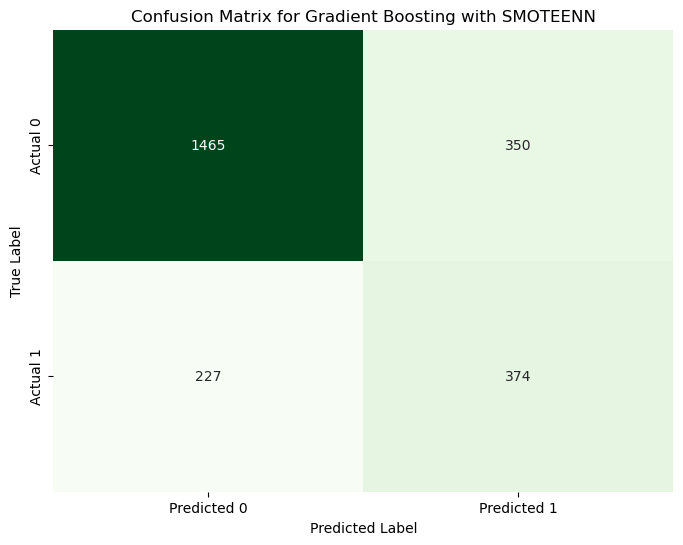

In [58]:
# Confusion Matrix for the best Gradient Boosting model (Gradient Boosting with SMOTEENN)

cm_gb_smoteenn = confusion_matrix(y_test, smoteenn_preds)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb_smoteenn, annot=True, fmt='d', cmap='Greens', cbar=False,
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gradient Boosting with SMOTEENN')
plt.show()

### XG Boost Model

In [59]:
# xg Boost
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### Model Evaluation

In [60]:
# xg boost model evaluation
xg_model_predictions = xg_model.predict(X_test)

# accuracy of model
xg_model_accuracy = round(accuracy_score(y_test, xg_model_predictions), 3)
print(f"Accuracy for XGBoost: {xg_model_accuracy} \n{'-' *60}")

# show the classification report
print('Classification Report: ')
print(classification_report(y_test, xg_model_predictions))

Accuracy for XGBoost: 0.782 
------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1815
           1       0.60      0.37      0.46       601

    accuracy                           0.78      2416
   macro avg       0.71      0.64      0.66      2416
weighted avg       0.76      0.78      0.76      2416



In [61]:
# Apply SMOTE to XG Boost

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Train XGBoost model with SMOTE
xg_smote = XGBClassifier(random_state=42)
xg_smote.fit(X_train_smote, y_train_smote)

# Predict & Evaluate
xg_smote_preds = xg_smote.predict(X_test)
print("\nXGBoost with SMOTE")
print(f"Accuracy: {round(accuracy_score(y_test, xg_smote_preds), 3)}")
print("Classification Report:\n", classification_report(y_test, xg_smote_preds))

Class distribution after SMOTE:
Target
0    7259
1    7259
Name: count, dtype: int64

XGBoost with SMOTE
Accuracy: 0.778
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1815
           1       0.56      0.50      0.53       601

    accuracy                           0.78      2416
   macro avg       0.70      0.68      0.69      2416
weighted avg       0.77      0.78      0.77      2416



In [62]:
# Apply SMOTEENN to XG Boost

# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)

print("Class distribution after SMOTEENN:")
print(pd.Series(y_train_smoteenn).value_counts())

# Train XGBoost model with SMOTEENN
xg_smoteenn = XGBClassifier(random_state=42)
xg_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

# Predict & Evaluate
xg_smoteenn_preds = xg_smoteenn.predict(X_test)
print("\nXGBoost with SMOTEENN")
print(f"Accuracy: {round(accuracy_score(y_test, xg_smoteenn_preds), 3)}")
print("Classification Report:\n", classification_report(y_test, xg_smoteenn_preds))

Class distribution after SMOTEENN:
Target
1    3619
0    3607
Name: count, dtype: int64

XGBoost with SMOTEENN
Accuracy: 0.761
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84      1815
           1       0.52      0.61      0.56       601

    accuracy                           0.76      2416
   macro avg       0.69      0.71      0.70      2416
weighted avg       0.78      0.76      0.77      2416



In [63]:
# Compare xgboost baseline with SMOTE, and SMOTEENN, and choose the best model.

# Collect metrics for XGBoost models
xg_results = {
    'Model': [
        'XGBoost (Baseline)',
        'XGBoost with SMOTE',
        'XGBoost with SMOTEENN'
    ],
    'Accuracy': [
        accuracy_score(y_test, xg_model_predictions),
        accuracy_score(y_test, xg_smote_preds),
        accuracy_score(y_test, xg_smoteenn_preds)
    ],
    'Precision_0': [
        precision_score(y_test, xg_model_predictions, pos_label=0),
        precision_score(y_test, xg_smote_preds, pos_label=0),
        precision_score(y_test, xg_smoteenn_preds, pos_label=0)
    ],
    'Recall_0': [
        recall_score(y_test, xg_model_predictions, pos_label=0),
        recall_score(y_test, xg_smote_preds, pos_label=0),
        recall_score(y_test, xg_smoteenn_preds, pos_label=0)
    ],
    'F1_0': [
        f1_score(y_test, xg_model_predictions, pos_label=0),
        f1_score(y_test, xg_smote_preds, pos_label=0),
        f1_score(y_test, xg_smoteenn_preds, pos_label=0)
    ],
    'Precision_1': [
        precision_score(y_test, xg_model_predictions, pos_label=1),
        precision_score(y_test, xg_smote_preds, pos_label=1),
        precision_score(y_test, xg_smoteenn_preds, pos_label=1)
    ],
    'Recall_1': [
        recall_score(y_test, xg_model_predictions, pos_label=1),
        recall_score(y_test, xg_smote_preds, pos_label=1),
        recall_score(y_test, xg_smoteenn_preds, pos_label=1)
    ],
    'F1_1': [
        f1_score(y_test, xg_model_predictions, pos_label=1),
        f1_score(y_test, xg_smote_preds, pos_label=1),
        f1_score(y_test, xg_smoteenn_preds, pos_label=1)
    ]
}

# Convert to DataFrame
xg_results_df = pd.DataFrame(xg_results)

# Display results
print("XGBoost Model Comparison")
display(xg_results_df)

# Find the best model based on a chosen metric
best_xg_model = xg_results_df.loc[xg_results_df['F1_1'].idxmax()]

print("\nBest XGBoost Model based on F1-score for Class 1")
display(best_xg_model.to_frame().T)

print(f"\nRecommendation: The best XGBoost model based on F1-score for Class 1 is '{best_xg_model['Model']}' with F1-score of {best_xg_model['F1_1']:.3f}")

XGBoost Model Comparison


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
0,XGBoost (Baseline),0.781871,0.814146,0.919559,0.863648,0.601093,0.366057,0.455016
1,XGBoost with SMOTE,0.778146,0.839979,0.870523,0.854978,0.560748,0.499168,0.528169
2,XGBoost with SMOTEENN,0.761175,0.861988,0.812121,0.836312,0.516997,0.607321,0.558531



Best XGBoost Model based on F1-score for Class 1


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
2,XGBoost with SMOTEENN,0.761175,0.861988,0.812121,0.836312,0.516997,0.607321,0.558531



Recommendation: The best XGBoost model based on F1-score for Class 1 is 'XGBoost with SMOTEENN' with F1-score of 0.559


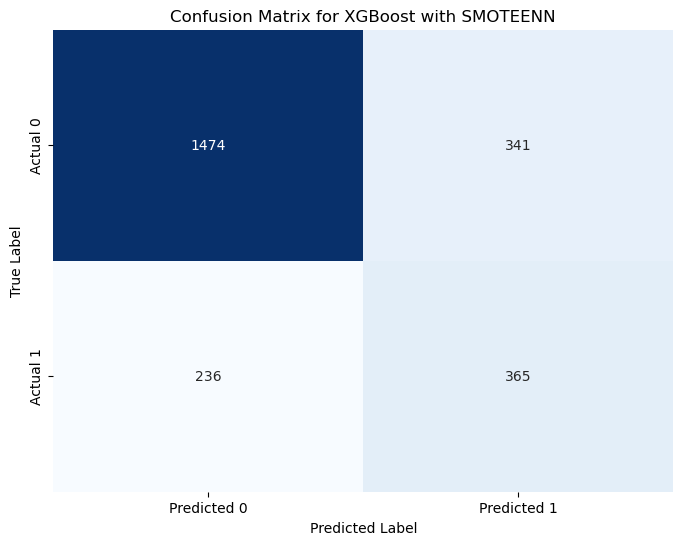

In [64]:
# Confusion Matrix for XGBoost with SMOTEENN
cm_xg_smoteenn = confusion_matrix(y_test, xg_smoteenn_preds)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xg_smoteenn, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost with SMOTEENN')
plt.show()

### Compare Metrics Side by Side

Side-by-Side Comparison of Best Models from Each Category (without Logistic Regression)


,Algorithm,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
0,Random Forest,Random Forest with SMOTEENN,0.739652,0.862027,0.777961,0.81784,0.482005,0.62396,0.543872
1,Decision Tree,Decision Tree with SMOTEENN,0.72144,0.851169,0.762534,0.804417,0.45443,0.597338,0.516175
2,Gradient Boosting,Gradient Boosting with SMOTEENN,0.761175,0.865839,0.807163,0.835472,0.516575,0.622296,0.564528
3,XGBoost,XGBoost with SMOTEENN,0.761175,0.861988,0.812121,0.836312,0.516997,0.607321,0.558531



Overall Best Model based on F1-score for Class 1


,Algorithm,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
2,Gradient Boosting,Gradient Boosting with SMOTEENN,0.761175,0.865839,0.807163,0.835472,0.516575,0.622296,0.564528



Recommendation: The overall best model based on F1-score for Class 1 is 'Gradient Boosting with SMOTEENN' with:
- Algorithm: Gradient Boosting
- F1-score: 0.565
- Accuracy: 0.761
- Precision (Class 1): 0.517
- Recall (Class 1): 0.622


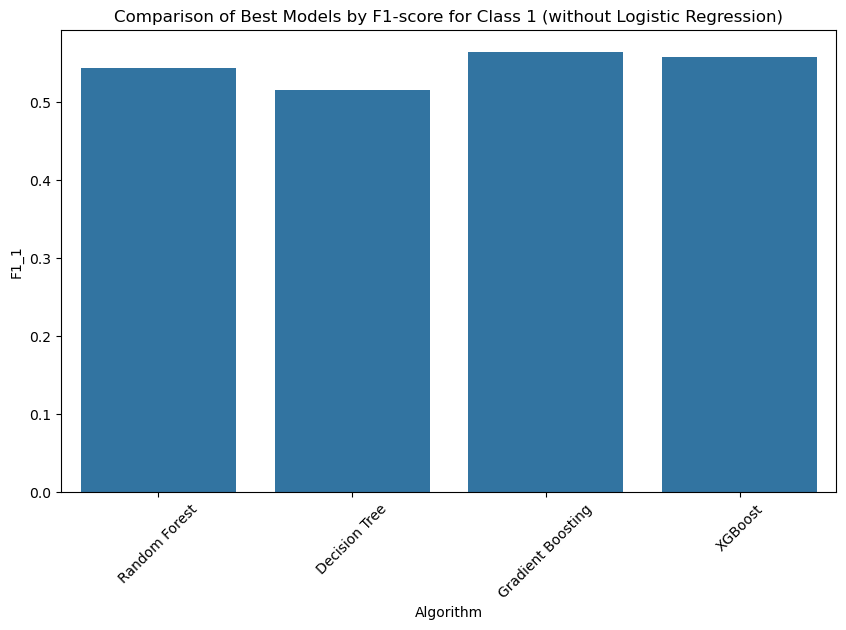

In [66]:
# Side-by-side comparison of the best models, and choose the overall best model

# Get the best model results from each category DataFrames
best_models = pd.concat([
    best_rf_model.to_frame().T,
    best_dt_model.to_frame().T,
    best_gb_model.to_frame().T,
    best_xg_model.to_frame().T
])

# Reset index for cleaner display
best_models = best_models.reset_index(drop=True)

# Add model family information for better interpretation
best_models['Algorithm'] = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'XGBoost']

# Reorder columns to show algorithm first
best_models = best_models[['Algorithm', 'Model', 'Accuracy', 'Precision_0', 'Recall_0', 'F1_0', 
                           'Precision_1', 'Recall_1', 'F1_1']]

# Display the comparison of the best models
print("Side-by-Side Comparison of Best Models from Each Category (without Logistic Regression)")
display(best_models)

# Find the overall best model based on F1-score for class 1
overall_best_model = best_models.loc[best_models['F1_1'].idxmax()]

print("\nOverall Best Model based on F1-score for Class 1")
display(overall_best_model.to_frame().T)

print(f"\nRecommendation: The overall best model based on F1-score for Class 1 is '{overall_best_model['Model']}' with:")
print(f"- Algorithm: {overall_best_model['Algorithm']}")
print(f"- F1-score: {overall_best_model['F1_1']:.3f}")
print(f"- Accuracy: {overall_best_model['Accuracy']:.3f}")
print(f"- Precision (Class 1): {overall_best_model['Precision_1']:.3f}")
print(f"- Recall (Class 1): {overall_best_model['Recall_1']:.3f}")

# Additional comparison visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='F1_1', data=best_models)
plt.title('Comparison of Best Models by F1-score for Class 1 (without Logistic Regression)')
plt.xticks(rotation=45)
plt.show()

### Plot the ROC Curve

The ***ROC Curve (Receiver Operating Characteristic)***  helps visualize the trade-off between true positive rate (recall) and false positive rate. The ***AUC score (Area Under the Curve)***  tells us how well the model separates the classes (closer to 1 is better).

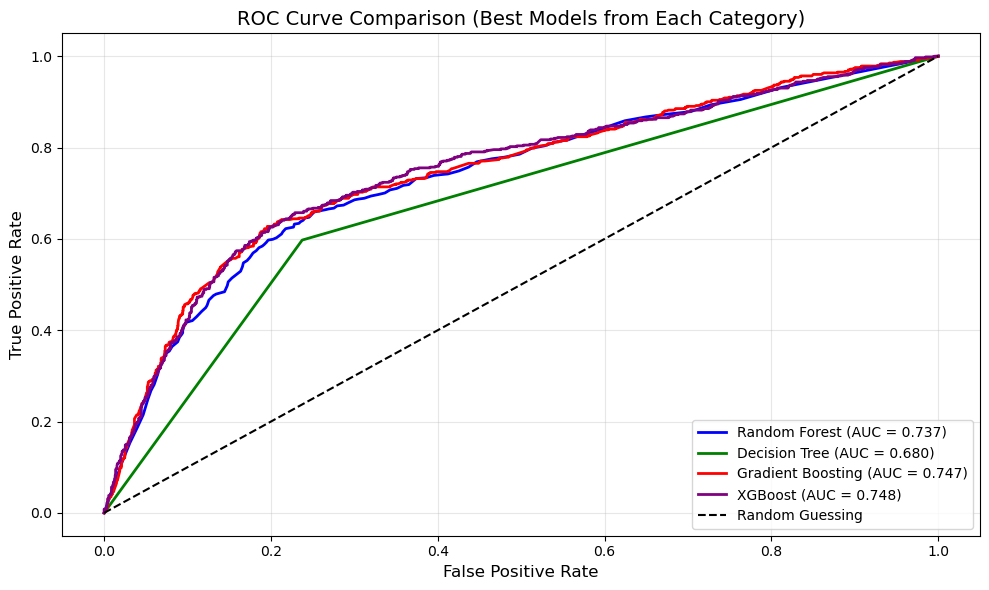


AUC Scores Comparison:
1. Gradient Boosting with SMOTEENN: 0.747
2. XGBoost with SMOTEENN: 0.748
3. Random Forest with SMOTEENN: 0.737
4. Decision Tree with SMOTEENN: 0.680

Best model based on AUC score: 'XGBoost with SMOTEENN' with AUC = 0.748


In [67]:
# Get probabilities for class 1 from the best models of each category
best_rf_probs = rf_smoteenn.predict_proba(X_test)[:, 1]
best_dt_probs = dt_smoteenn.predict_proba(X_test)[:, 1]
best_gb_probs = gb_smoteenn.predict_proba(X_test)[:, 1]
best_xg_probs = xg_smoteenn.predict_proba(X_test)[:, 1]

# Calculate ROC Curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, best_rf_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, best_dt_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, best_gb_probs)
xg_fpr, xg_tpr, _ = roc_curve(y_test, best_xg_probs)

# Calculate AUC Scores
rf_auc = roc_auc_score(y_test, best_rf_probs)
dt_auc = roc_auc_score(y_test, best_dt_probs)
gb_auc = roc_auc_score(y_test, best_gb_probs)
xg_auc = roc_auc_score(y_test, best_xg_probs)

# Plotting and Formatting
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.3f})", color='blue', linewidth=2)
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.3f})", color='green', linewidth=2)
plt.plot(gb_fpr, gb_tpr, label=f"Gradient Boosting (AUC = {gb_auc:.3f})", color='red', linewidth=2)
plt.plot(xg_fpr, xg_tpr, label=f"XGBoost (AUC = {xg_auc:.3f})", color='purple', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison (Best Models from Each Category)', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Annotate the best performing model
best_auc = max([rf_auc, dt_auc, gb_auc, xg_auc])
if best_auc == gb_auc:
    plt.annotate('Best Model', xy=(gb_fpr[50], gb_tpr[50]), xytext=(0.4, 0.6),
                arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=12, color='red')
plt.show()

# Print AUC scores comparison
print("\nAUC Scores Comparison:")
print(f"1. Gradient Boosting with SMOTEENN: {gb_auc:.3f}")
print(f"2. XGBoost with SMOTEENN: {xg_auc:.3f}")
print(f"3. Random Forest with SMOTEENN: {rf_auc:.3f}")
print(f"4. Decision Tree with SMOTEENN: {dt_auc:.3f}")

# Determine best model based on AUC
best_auc_model = max([
    ('Random Forest with SMOTEENN', rf_auc),
    ('Decision Tree with SMOTEENN', dt_auc),
    ('Gradient Boosting with SMOTEENN', gb_auc),
    ('XGBoost with SMOTEENN', xg_auc)
], key=lambda x: x[1])

print(f"\nBest model based on AUC score: '{best_auc_model[0]}' with AUC = {best_auc_model[1]:.3f}")

## Final Verdict
For most imbalanced classification tasks, the ***Gradient Boosting with SMOTEENN*** is the best overall model due to its superior `F1-score` and `recall` for the minority class (Class 1), while maintaining competitive `AUC` and `accuracy`.

### Feature Importance for Gradient Boosting with SMOTEENN

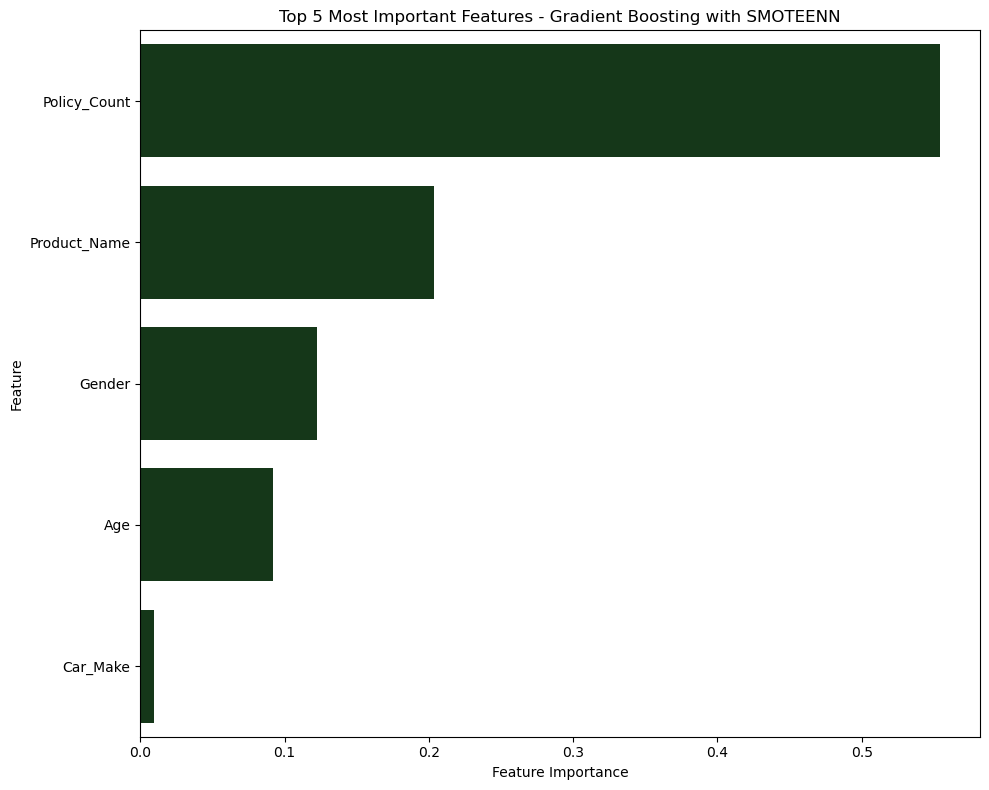

In [69]:
# features importance for the overall best model (Gradient Boosting with SMOTEENN)

# Get feature importances from the trained Gradient Boosting with SMOTEENN model
importances = gb_smoteenn.feature_importances_

# Get the feature names used during training
feature_names = X_train.columns.tolist()

# Combine into DataFrame and sort
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot Top 5 Features
plt.figure(figsize=(10, 8))
sns.barplot(data=feat_importance_df.head(), x='Importance', y='Feature', color='#0F3D15')
plt.title("Top 5 Most Important Features - Gradient Boosting with SMOTEENN")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()